<a href="https://colab.research.google.com/github/nokados/alternate/blob/main/Alternate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternate MVP

*Carpe diem. Memento mori*

Здесь должно быть описание что это такое, зачем все это и как этим пользоваться

TODO:
- Отрисовка квадратиков жизни
- Создание проектов (без подпроектов)
- Создание их стохастических функций времени (сумма синусоид, ШИМ со случайной длиной волны, ШИМ с затуханием, )
- 1 стратегия для комбинирования - колесо фортуны по приоритету
- Отрисовка финального графика, подсчет статистики для 1 симуляции
- В конце ноутбука обратная связь через Google Forms, мои контакты и донаты

## Сколько осталось жить?

Рисуем график с вероятностью остаться в живых в каждый следующий день. Вертикальной чертой на графике отмечена средняя дата смерти.

*Сейчас для простоты в качестве метода оценки смертности берется смертность в России в 2018, без разделения по полу. Данные из https://platform.who.int/mortality/themes/theme-details/MDB/all-causes
TODO: 1) полноценно проанализировать полный датасет, сделать более точную оценку с выборкой по стране и полу и другими параметрами. 2) сделать возможность варьировать личную оценку смертности*

In [ ]:
# @title { run: "auto", display-mode: "form" }
# @markdown ### Введите пол:
# @markdown Построенный график показывает смертность по возрастам для выбранного
# @markdown пола.

# @markdown **Внимание:**  Эти вероятности очень условны и совсем не претендуют
# @markdown на истинность. Распределение выбрано методом пальцем в небо,
# @markdown а данные для подгонки сгенерированы искусственно. Не говоря уж о том,
# @markdown что они не учитывают ваш образ жизни и тренд на повышение
# @markdown продолжительности жизни. Подробнее -
# @markdown https://colab.research.google.com/drive/1mcxwcsrioNe4bygk2TYTfv8V-fYidhva?usp=sharing

# @markdown Так что можете подкрутить график, как вам нравится. Чтобы сбросить
# @markdown изменения выберите пол заново

# @markdown ---

from datetime import datetime, timedelta

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interactive
from scipy.stats import weibull_min

sex = "Мужской" # @param ["Мужской", "Женский"]


if sex == "Мужской":
    c = 4.133981693607855
    scale = 71.55956958252537
    bias = 2.600743376894613
else:
    c = 4.648590855539192
    scale = 83.5322317160395
    bias = 0.9647339058160895

death_distr = None

# Функция, которую будем отрисовывать
def plot_function(c, **kwargs):
    global death_distr
    x = np.linspace(0, 150, 400)
    death_distr = weibull_min(c, **kwargs)
    y = death_distr.pdf(x)

    mean_value = death_distr.mean()
    median_value = death_distr.median()
    quantile_25 = death_distr.ppf(0.25)
    quantile_75 = death_distr.ppf(0.75)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="Плотность смертности")

    # Добавляем среднее значение, медиану и квантили на график
    plt.axvline(
        mean_value, color='r', linestyle='--',
        label=f'Среднее: {mean_value:.2f}'
    )
    plt.axvline(
        median_value, color='g', linestyle='--',
        label=f'Медиана: {median_value:.2f}'
    )
    plt.axvline(
        quantile_25, color='b', linestyle='--',
        label=f'25% квантиль: {quantile_25:.2f}'
    )
    plt.axvline(
        quantile_75, color='b', linestyle='--',
        label=f'75% квантиль: {quantile_75:.2f}'
    )


    plt.xlabel('Возраст')
    plt.ylabel('Вероятность смерти')
    plt.title('Распределение смертности по возрасту')
    plt.legend()

    plt.grid(True)
    plt.show()

# Создаем интерактивные слайдеры для изменения параметров
interactive_plot = interactive(
    plot_function,
    c=widgets.FloatSlider(value=c, min=1, max=20, step=0.1),
    loc=widgets.FloatSlider(value=bias, min=0, max=50, step=0.5),
    scale=widgets.FloatSlider(value=scale, min=0, max=300, step=0.5)
)

# Отображаем интерактивный график
interactive_plot

interactive(children=(FloatSlider(value=4.133981693607855, description='c', max=20.0, min=1.0), FloatSlider(va…

In [ ]:
# @title { run: "auto", display-mode: "form" }
# @markdown ### Введите дату рождения:

birth_date = '1990-01-29' # @param {type:"date"}
birth_date = datetime.fromisoformat(birth_date)
current_date = datetime.now()


def calculate_age(birth_date, target_date):
    # Вычисляем возраст в годах
    age = target_date.year - birth_date.year

    # Проверяем, был ли день рождения в текущем году
    if (target_date.month, target_date.day) < (birth_date.month, birth_date.day):
        age -= 1

    last_digit = age % 10
    if last_digit == 1 and age != 11:
        age_str = "год"
    elif (
        last_digit > 1
        and last_digit < 5
        and (age < 10 or age > 15)
    ):
        age_str = "года"
    else:
        age_str = "лет"

    return age, age_str


age, age_str = calculate_age(birth_date, current_date)
delta = current_date - birth_date
death_age = death_distr.expect(lb=delta.days / 365.25, conditional=True)
death_date = birth_date + timedelta(days=death_age * 365.25)
death_age, death_age_str = calculate_age(birth_date, death_date)
lifespan_days = (death_date - current_date).days

print(
    f"Учитывая, что на сегодняшний день вам {age} {age_str}, "
    f"ваша средняя дата смерти - {death_date.strftime('%d.%m.%Y')}\n"
    f"в возрасте {death_age} {death_age_str}.\n"
    f"Осталось жить: {lifespan_days} дней = {lifespan_days / 7:.2f} недель = "
    f"{lifespan_days / 365.25:.2f} лет."
)


Учитывая, что на сегодняшний день вам 34 года, ваша средняя дата смерти - 29.01.2059
в возрасте 69 лет.
Осталось жить: 12606 дней = 1800.86 недель = 34.51 лет.


In [ ]:
# запусти код этой клетки нажав на треугольник Play слева
# или нажми на клетку, а затем Ctrl + Enter

import math
# Измени эти значения, на свои, если не нравятся рассчитанные
# количество прожитых недель
weeks_passed = (current_date - birth_date).days // 7
# количество оставшихся недель
weeks_left = math.ceil(lifespan_days / 7)

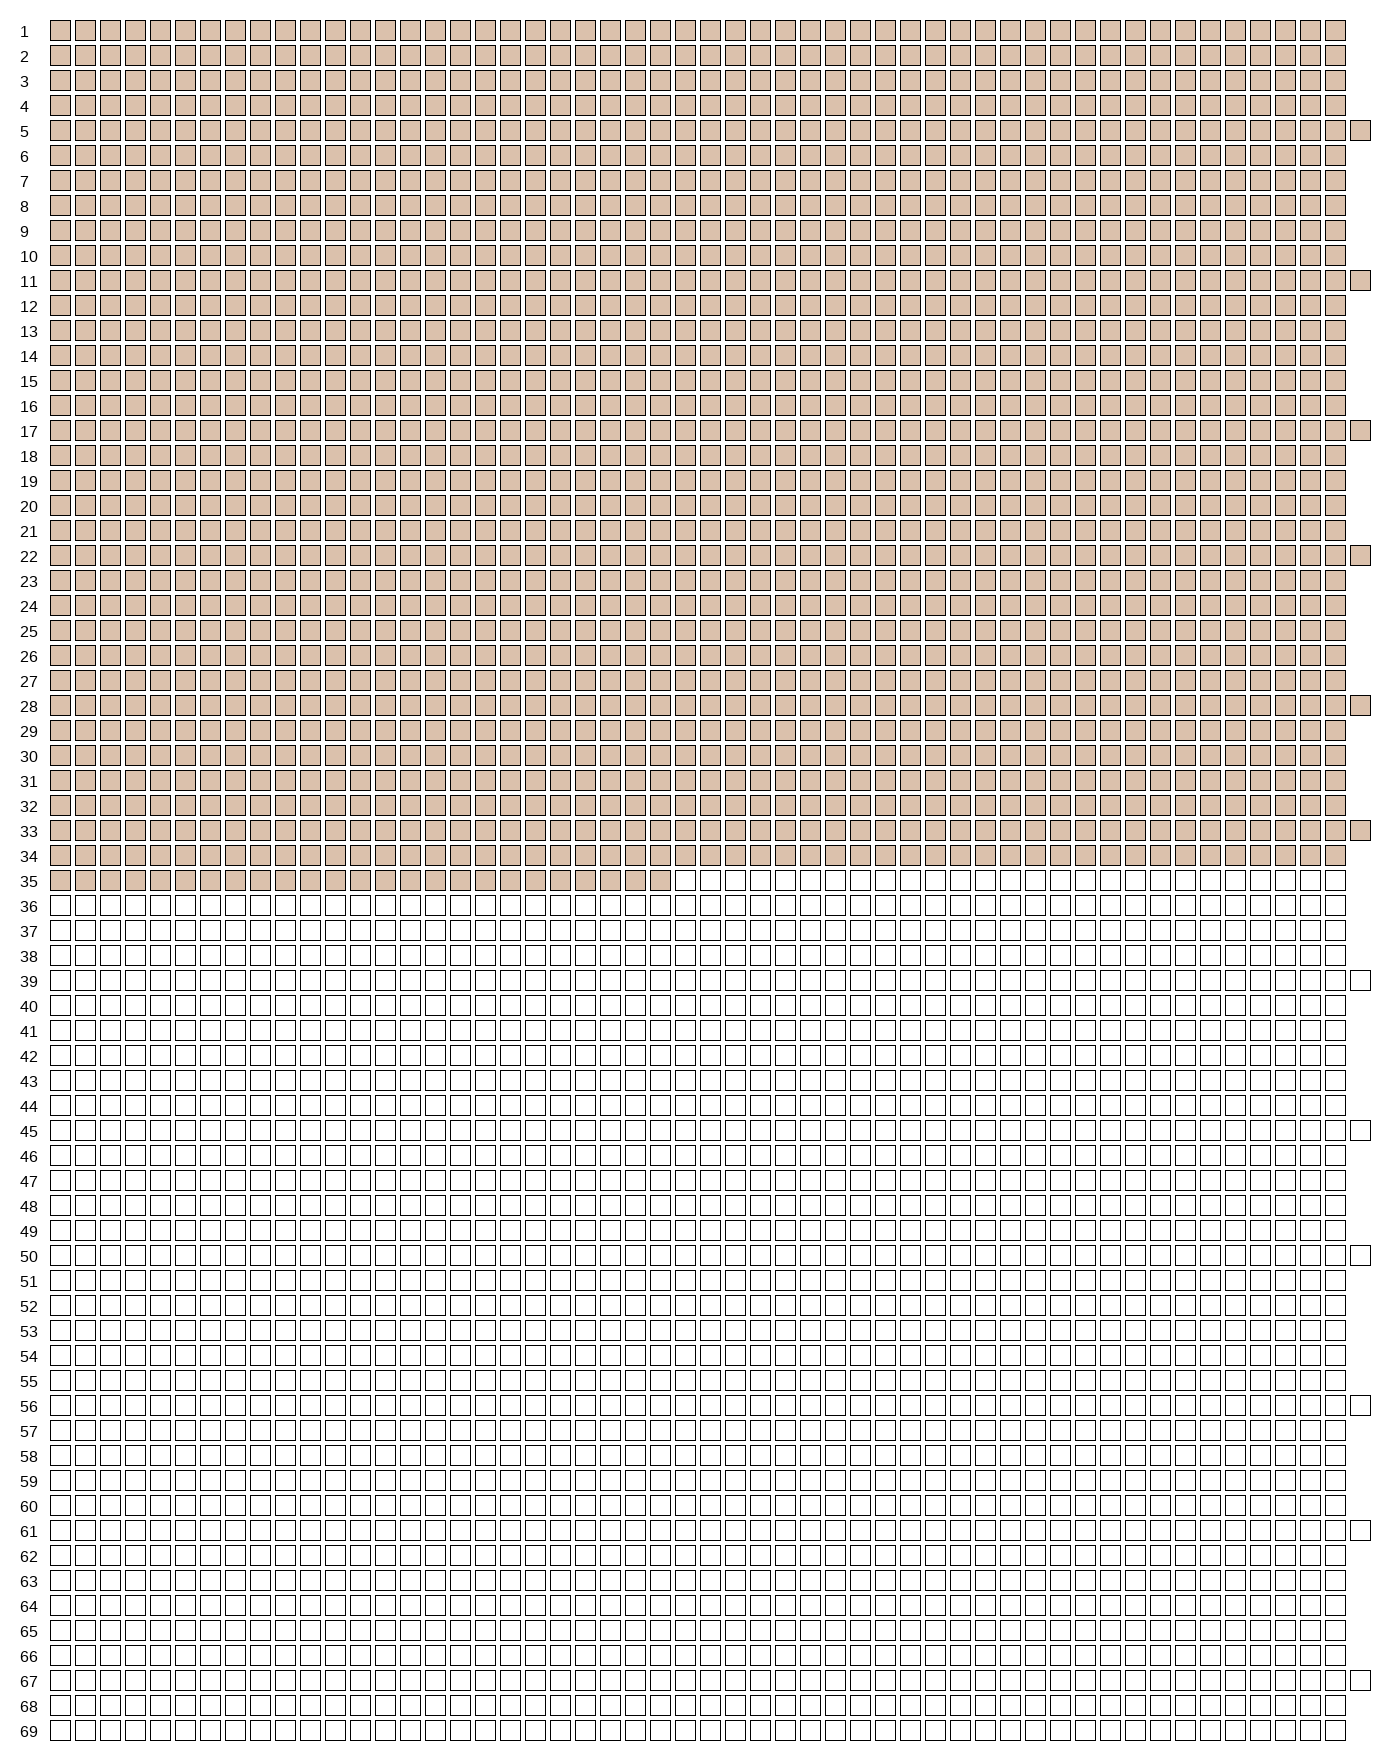

In [ ]:
# @title Квадратики неделей жизни { display-mode: "form" }
import math
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def draw_week_squares_pillow(weeks_passed, weeks_left, gap=5, margin=20):
    total_weeks = weeks_passed + weeks_left
    years = math.ceil(total_weeks * 7 / 365.25)
    weeks_per_year = 52
    square_size = 20
    text_margin = 30  # Дополнительное пространство для текста
    image_width = (weeks_per_year + 1) * (square_size + gap) - gap + 2 * margin + text_margin
    image_height = years * (square_size + gap) - gap + 2 * margin

    # Создаем новое изображение
    image = Image.new("RGB", (image_width, image_height), "white")
    draw = ImageDraw.Draw(image)

    # Настраиваем шрифт
    font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf"  # Путь к шрифту LiberationSans
    try:
        font = ImageFont.truetype(font_path, 16)
    except IOError:
        font = ImageFont.load_default()

    year = -1
    new_line = True
    extra_days = 0  # непосчитанные дни: 1 день в году не попадает в неделю + 1 день в високосный
    next_year_week = 0

    for week in range(total_weeks):
        if week == next_year_week:
            year += 1
            week_in_year = 0
            year_number = str(year + 1)
            text_x = margin
            text_y = margin + year * (square_size + gap) + (square_size / 2) - 8
            draw.text((text_x, text_y), year_number, fill="black", font=font)
            next_year_week += 52
            extra_days += 1 + (year % 4 == 0)
            if extra_days >= 7:
                next_year_week += 1
                extra_days -= 7

        if week < weeks_passed:
            fill_color = "#dbc1ac"  # Закрашенные (пройденные) недели
        else:
            fill_color = "white"  # Незакрашенные (оставшиеся) недели

        x = text_margin + margin + week_in_year * (square_size + gap)
        y = margin + year * (square_size + gap)
        draw.rectangle([x, y, x + square_size, y + square_size], outline="black", fill=fill_color)
        week_in_year += 1


    display(image)

# Пример использования: 30 недель пройденных и 22 недели оставшихся
draw_week_squares_pillow(weeks_passed, weeks_left, gap=5, margin=20)


## Кто я?

Каким сферам я хочу уделять время? Какое мое многоборье? Создай проект под каждую свою деятельность, включая отдых. Например:
- Предприниматель
- Музыкант
- Семьянин
- Друг
- Путшественник
- Иноагент
- Колдун
- Отдых

In [2]:
import ipywidgets as widgets
from IPython.display import display

print(
    "Укажите сколько в день активных часов = 24 - время на сон - время на еду"
    " - другое время, которое нельзя потратить на проекты"
)

active_hours_widget = widgets.FloatSlider(value=16, min=0.25, max=24, step=0.25)
active_hours_widget

Укажите сколько в день активных часов = 24 - время на сон - время на еду - другое время, которое нельзя потратить на проекты


FloatSlider(value=16.0, max=24.0, min=0.25, step=0.25)

In [13]:
import random
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Layout

# default styling
class StyledWidgets:
    def __init__(self, style, layout):
        self.style = style
        self.layout = layout

    def __getattr__(self, name):
        original_attr = getattr(widgets, name)
        if callable(original_attr) and name[0] == name[0].upper():
            def wrapper(*args, **kwargs):
                if "layout" not in kwargs:
                    kwargs["layout"] = self.copy_layout(self.layout)
                res = original_attr(*args, **kwargs)
                if "description" in kwargs:
                    for key, value in self.style.items():
                        setattr(res.style, key, value)
                return res
            return wrapper
        else:
            return original_attr

    @staticmethod
    def copy_layout(layout):
        if not isinstance(layout, widgets.Layout):
            raise TypeError("Input must be an instance of ipywidgets.Layout")
        layout_attrs = {
            attr: getattr(layout, attr)
            for attr in layout.keys
            if getattr(layout, attr) is not None
            and not attr.startswith("_")
        }

        new_layout = widgets.Layout(**layout_attrs)
        return new_layout


styled_widgets = StyledWidgets(
    {"description_width": "initial"},
    Layout(width="500px", height="50px")
)


print("Задайте имя проекта, выберите для него цвет и настройте функции его времени")

# Имя проекта
project_name_widget = styled_widgets.Text(
    value='Писатель',
    placeholder='Кто я?',
    description='Имя проекта:',
    disabled=False
)

# Инструкция
instruction_html = styled_widgets.HTML(
    value="""
    <p>Создайте функцию времени. Для этого выберите ее форму и период.</p>
    <p>
      Доступные формы:
      <ul>
        <li> <b>константная</b>: когда каждый день выделено одинаковое время </li>
        <li> <b>квадратная</b>: когда временами делается фиксированный фокус на проект </li>
        <li> <b>синусоида</b>: когда время на сферу меняется плавно </li>
      </ul>
    </p>
    <p>
      Параметры:
      <ul>
        <li>
          <b>Диапазон часов</b>: задай диапазон от <i>часов на минимуме</i>
          до <i>часов на пике</i>, где:
          <ul>
            <li> <b>часов на пике</b>: высота функции - сколько часов в день
            выделено в точке, когда функция достигает максимума </li>
            <li> <b>часов на минимуме</b>: нижняя точка функции - сколько часов в
            день выделено на минимуме (минимальное полезное действие в день) </li>
          </ul>
        </li>
        <li> <b>период</b>: период полного цикла проекта в днях </li>
        <li> <b>активный период</b>: для квадратной функции сколько дней из
        всего периода отведено под проект (оставшиеся дни делается минимальное
        полезное действие, если нужно) </li>
      </ul>
    """,
)
instruction_html.layout.width = "600px"
instruction_html.layout.height = "initial"

# Цвет проекта
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

try:
    choosen_color
except NameError:
    choosen_color = None

color_picker = styled_widgets.ColorPicker(
    description="Выберите цвет:",
    value=random_color() if choosen_color is None else choosen_color,
    disabled=False
)

def on_color_change(change):
    global choosen_color
    choosen_color = change["new"]
    project_name = project_name_widget.value
    print(f'Для проекта "{project_name}" вы выбрали цвет: {change["new"]}')

color_picker.observe(on_color_change, names="value")

# Выбор формы
form_selector = styled_widgets.Dropdown(
    options=["Константная", "Квадратная", "Синусоида"],
    value="Константная",
    description="Форма функции времени:",
)

# Диапазон часов
hours_slider = styled_widgets.FloatRangeSlider(
    value=(0, 8),
    min=0,
    max=active_hours_widget.value,
    step=0.25,
    description="Диапазон часов:",
)

# Периоды активности
stochastic_checkbox = styled_widgets.Checkbox(
    value=False,
    description="Случайные периоды активности",
    disabled=False
)

regenerate_button = styled_widgets.Button(
    description="Пересгенерировать",
    disabled=False,
)
# Создаем невидимый виджет
update_trigger = widgets.Label()

def redraw_plot(button):
    # Меняем значение невидимого виджета, чтобы вызвать обновление
    update_trigger.value = str(np.random.random())

regenerate_button.on_click(redraw_plot)


period_widget = styled_widgets.IntText(
    value=7,
    min=1,
    step=1,
    description="Период в днях"
)

active_period_widget = styled_widgets.IntText(
    value=5,
    min=1,
    step=1,
    description="Активный период в днях"
)

stochastic_checkbox.layout.display = "none"
period_widget.layout.display = "none"
active_period_widget.layout.display = "none"
regenerate_button.layout.display = "none"

# Функция обратного вызова для изменения видимости текстового поля
def on_form_change(change):
    if change["new"] == "Константная":
        stochastic_checkbox.layout.display = "none"
        regenerate_button.layout.display = "none"
        period_widget.layout.display = "none"
        active_period_widget.layout.display = "none"
    elif change["new"] == "Квадратная":
        stochastic_checkbox.layout.display = "block"
        if stochastic_checkbox.value:
            regenerate_button.layout.display = "block"
        else:
            regenerate_button.layout.display = "none"
        period_widget.layout.display = "block"
        active_period_widget.layout.display = "block"
    elif change["new"] == "Синусоида":
        stochastic_checkbox.layout.display = "none"
        regenerate_button.layout.display = "none"
        period_widget.layout.display = "block"
        active_period_widget.layout.display = "none"


form_selector.observe(on_form_change, names="value")


# Функция обратного вызова на чекбокс случайности
def on_stochastic_change(change):
    if change["new"]:
        period_widget.description = "Средний период в днях"
        active_period_widget.description = "Средний активный период в днях"
        regenerate_button.layout.display = "block"
    else:
        period_widget.description = "Период в днях"
        active_period_widget.description = "Активный период в днях"
        regenerate_button.layout.display = "none"


stochastic_checkbox.observe(on_stochastic_change, names="value")


def plot_time_function(
    color,
    form,
    hours_range,
    is_stochastic,
    update_trigger,
    period,
    active_period
):
    hours_min, hours_max = hours_range
    if period <= 7:
        last_day = 14
    elif period <= 15:
        last_day = 30
    elif period <= 31:
        last_day = 61
    elif period <= 365:
        last_day = 365
    else:
        last_day = period + 30

    x = np.arange(last_day)
    if form == "Константная":
        y = np.full_like(x, hours_max)
    if form == "Квадратная":
        if is_stochastic:
            day = 0
            y = np.full_like(x, hours_min)
            while day < last_day:
                next_active_period = day + int(np.round(np.random.exponential(scale=period)))
                active_period_length = int(np.round(np.random.exponential(scale=active_period)))
                if next_active_period >= last_day:
                    break
                y[next_active_period:next_active_period + active_period_length] = hours_max
                day += next_active_period + active_period_length
        else:
            square_mask = (np.arange(last_day) % period) < active_period
            y = np.where(square_mask, hours_max, hours_min)

    if form == "Синусоида":
        # Генерация значений синусоиды от -1 до 1
        y_raw = np.sin(2 * np.pi * x / period)

        # Масштабирование значений синусоиды от sin_min до sin_max
        y = (y_raw + 1) / 2 * (hours_max - hours_min) + hours_min

    plt.figure(figsize=(10, 5))
    # plt.plot(x, y, color=color)
    plt.fill_between(x, y, color=color)
    plt.ylim(0, 24)
    plt.xlabel("Дни")
    plt.ylabel("Количество часов")
    plt.title("Количество часов на проект по дням")
    plt.grid(True)
    plt.show()


interactive_plot = widgets.interactive_output(
    plot_time_function,
    dict(
        color=color_picker,
        form=form_selector,
        hours_range=hours_slider,
        is_stochastic=stochastic_checkbox,
        update_trigger=update_trigger,
        period=period_widget,
        active_period=active_period_widget
    )
)


# Настройка Layout
item_layout = widgets.Layout(flex='1 1 auto', width='auto')
container_layout = widgets.Layout(display='flex', flex_flow='row wrap', align_items='stretch')

# Объединение виджетов в контейнеры
ui_container = widgets.VBox([
    project_name_widget,
    instruction_html,
    color_picker,
    form_selector,
    hours_slider,
    stochastic_checkbox,
    regenerate_button,
    period_widget,
    active_period_widget
], layout=item_layout)

plot_container = widgets.VBox([interactive_plot], layout=item_layout)

# Основной контейнер
main_container = widgets.HBox([ui_container, plot_container], layout=container_layout)

# Отображение
display(main_container)

Задайте имя проекта, выберите для него цвет и настройте функции его времени
